In [9]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.optimize import fmin_cg
from sklearn.metrics import precision_recall_fscore_support

In [10]:
#import data


def load(filename):
    '''
    filenname: string ('test.csv')
    
    returns: DataFrame
    '''
    data = pd.DataFrame.from_csv(filename, encoding = 'utf-8')
    print '\nData Columns:'
    for i in range(len(data.columns)):
        print '\t',i,'\t', data.columns[i]

    check(data)
    
    return data

def check(X):
    '''
    X: DataFrame or Series
    
        prints shape and head
    
    returns: None
    '''
    print '\nShape is:\n', X.shape
    print X.head()

data = load('cs-training.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30-59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60-89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(150000, 11)
   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982           9120   
2                                     0   0.121876           2600   
3                                     1   0.085113  

In [11]:
'''
# Shuffle index
index = np.array(data.index)
random.shuffle(index)

print index.shape
print index

# training set (60%)
trainingSize = data.shape[0] * 0.60
training = data.ix[index[:trainingSize]]

training.to_csv('training.csv', encoding='utf-8')

print '\n', training.shape
print training.head()

# crossValidation set (20%)
crossValSize = data.shape[0] * 0.20
crossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]

crossValidation.to_csv('crossValidation.csv', encoding='utf-8')

print '\n', crossValidation.shape

# test set (20%)
test = data.ix[index[trainingSize + crossValSize:]]

test.to_csv('test.csv', encoding = 'utf-8')

print '\n', crossValidation.shape
'''

"\n# Shuffle index\nindex = np.array(data.index)\nrandom.shuffle(index)\n\nprint index.shape\nprint index\n\n# training set (60%)\ntrainingSize = data.shape[0] * 0.60\ntraining = data.ix[index[:trainingSize]]\n\ntraining.to_csv('training.csv', encoding='utf-8')\n\nprint '\n', training.shape\nprint training.head()\n\n# crossValidation set (20%)\ncrossValSize = data.shape[0] * 0.20\ncrossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]\n\ncrossValidation.to_csv('crossValidation.csv', encoding='utf-8')\n\nprint '\n', crossValidation.shape\n\n# test set (20%)\ntest = data.ix[index[trainingSize + crossValSize:]]\n\ntest.to_csv('test.csv', encoding = 'utf-8')\n\nprint '\n', crossValidation.shape\n"

In [12]:
# load files

training = load('training.csv')
cv = load('crossValidation.csv')
test = load('test.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30-59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60-89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(90000, 11)
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
42082                  1                              1.173509   33   
47463                  0                              0.040118   67   
6412                   0                              0.228882   68   
142967                 0                              0.558521   50   
51191                  0                              0.000000   65   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                                      3   0.430443           5570   
47463                                      0   0.007237          10500   
6412    

In [13]:
# 0. PROCESS DATA (-> X, y)
    # X
    # y
    # feature scaling

# I. TRAIN (-> theta)
    # theta = fmincg(CostFunction, X, y, lambda, initial_theta)

    # (J, grad) = CostFunction(X, y, lambda)

# II. PREDICT (-> h(x))

# h = predict(X)

# III. GET ACCURACY & F-SCORE

# 0. PROCESS DATA (-> Xtrain, ytrain)
##Xtrain
##ytrain
##featureScale
##addBias

In [14]:
# 0. PROCESS DATA (-> X, y)
def splitData(Xandy):
    '''
    Xandy:
    
    returns: X, y
    '''
    X = Xandy.iloc[:, 1:]
    #check(Xtrain)

    y = Xandy['SeriousDlqin2yrs']
    #check(ytrain)
    
    # fill nan with 0
    X = X.fillna(0)
    y = y.fillna(0)
    return X, y

Xtrain, ytrain = splitData(training)
(m, n) = Xtrain.shape # m: # of examples /n: # of attributes

# feature scaling
def featureScale(X):
    '''
    X: DataFrame
    
    returns: DataFrame (feature scaled)
    '''
    for col in range(X.shape[1]):
        #print 'col index:', col
        copied = X.iloc[:, col]
        #print 'head\n', copied.head()
        #print 'mean: ', copied.mean()
        #print 'std: ', copied.std()
        X.iloc[:, col] = (copied - copied.mean())/copied.std()
    return X

Xtrain = featureScale(Xtrain)
check(Xtrain)
     
# Add Bias terms to Xtrain
def addBias(X):
    '''
    X: DataFrame (m * n)
    
        Adds bias terms to the first column
    
    returns: DataFrame (m * (n + 1))
    '''
    X.insert(0, 'Bias', 1)
    return X

Xtrain = addBias(Xtrain)
check(Xtrain)




Shape is:
(90000, 10)
        RevolvingUtilizationOfUnsecuredLines       age  \
42082                              -0.021570 -1.303803   
47463                              -0.027005  0.996573   
6412                               -0.026100  1.064231   
142967                             -0.024519 -0.153615   
51191                              -0.027197  0.861257   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                               0.599827  -0.240037       0.018670   
47463                              -0.100036  -0.240334       0.435878   
6412                               -0.100036  -0.240243      -0.125025   
142967                             -0.100036  -0.240191       0.630518   
51191                              -0.100036  -0.240334      -0.135349   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
42082                          0.889610                 1.108264   
47463                          1.669514        

In [15]:
Xcv, ycv = splitData(cv)
Xcv = featureScale(Xcv)
Xcv = addBias(Xcv)

Xtest, ytest = splitData(test)
Xtest = featureScale(Xtest)
Xtest = addBias(Xtest)

# I. TRAIN (-> theta)
## theta = fmin_cg(CostFunction, X, y, lambda, initial_theta)
## J = costFunction(X, y, lambda)
## grad = gradFunction

In [16]:


# logisticRegression

L = 0.1

def logisticRegression(costfunction, gradFunction, X, y, L):
    '''
    constFunction: function
    X: matrix
    y: vector
    L (lambda): float
    
    returns: vector (theta)
    '''
    initial_theta = np.zeros(n+1)
    args = (X, y, L)
    theta = fmin_cg(f = costFunction, x0 = initial_theta, \
                    fprime = gradFunction, args = args)
    return theta

# costFunction
def costFunction(theta, *args):
    '''
    theta: vector
    X: matrix
    y: vector
    L (lambda): float
    
    returns: float (J)
    '''
    #J = sum(np.multiply(np.log(sigmoid(X.dot(theta))), -y) - \
    #       np.multiply((1 - y),log(1 - sigmoid(X.dot(theta)))))/m 
    theta = theta.reshape((n+1, 1))
    
    X, y, L = args
    y = pd.DataFrame(y)
    y = y.rename(columns = {'SeriousDlqin2yrs':0})
    
    J = np.log(sigmoid(X.dot(theta))).T.dot(-y)
    #print '1',J
    J = J - pd.DataFrame(1 - y).T.dot(np.log(1 - sigmoid(X.dot(theta))))
    #print '2', J
    J = np.sum(J)/m
    #print '3', J
    J = J + (L/(2.0*m)) * np.sum(theta[1:]**2)
    #print '4',J
    
    return np.array(J)

# gradFunction
def gradFunction(theta, *args):
    # grad = transpose(sigmoid(X * y)) * y + lambda * sum(theta[1:])/m
    theta = theta.reshape((n+1, 1))
    
    X, y, L = args
    y = pd.DataFrame(y)
    y = y.rename(columns = {'SeriousDlqin2yrs':0})
    
    grad = X.T.dot(sigmoid(X.dot(theta)) - pd.DataFrame(y))/m
    #print grad.shape
    
    # Regularize
    theta = (L/m)*theta
    theta[0] = 0
    #print theta.shape
    #print theta
    
    grad = np.array(grad + theta)
    grad = grad.reshape(n+1)
    
    return grad

# sigmoid
def sigmoid(z):
    '''
    x: float
    
    returns: float
    '''
    return 1.0/(1.0 + np.exp(-z))






In [17]:
#theta = logisticRegresssion()
theta = np.zeros((n+1, 1))
args = (Xtrain, ytrain, L)
J = costFunction(theta, *args)
print J

[ 0.69314718]


In [18]:
# grad
args = (Xtrain, ytrain, L)
grad = gradFunction(theta, *args)
print grad

[  4.33655556e-01   6.25321947e-05   2.90906540e-02  -3.09406426e-02
   2.10450005e-03   3.37108542e-03   6.87684072e-03  -2.89193348e-02
   1.38170311e-03  -2.54732107e-02  -1.19724349e-02]


In [19]:
# Logistic Regression
#initial_theta = np.zeros((n+1, 1))
theta = logisticRegression(costFunction, gradFunction, Xtrain, ytrain, L)
print theta

Optimization terminated successfully.
         Current function value: 0.224438
         Iterations: 103
         Function evaluations: 274
         Gradient evaluations: 274
[ -2.86425342e+00  -6.93934244e-04  -4.45158330e-01   2.12752698e+00
  -7.14389356e-02  -3.18174522e-01  -2.89944282e-02   1.91655296e+00
   8.11630818e-02  -3.88869553e+00   1.11188034e-01]


# II. PREDICT (-> h(x))

    h = predict(X)
    
# III. GET ACCURACY & F-SCORE


In [20]:
def predict(theta, X, y, threshold = 0.5):
    '''
    theta
    X
    y
    L
    
        prints measures (accuracy, precision, recall, F-score)
    
    returns: prediction(vector) 
            
    '''
    # get prediction
    prediction = getPrediction(theta, X, threshold)
    
    # get measures
    measures = getMeasures(y, prediction)
    accuracy, precision, recall, fscore = measures
    
    print 'accuracy', accuracy
    print 'precision', precision
    print 'recall', recall
    print 'fscore', fscore
    
    return prediction

def getPrediction(theta, X, threshold = 0.5):
    '''
    
    returns: vector of labels (0, 1)
    '''
    
    probability = sigmoid(X.dot(theta))
    prediction = probability > threshold
    
    return prediction * 1

def getMeasures(y, prediction):
    '''
    
    returns: measures
    '''
    accuracy = (prediction == y).mean()
    
    precision, recall, f_score, support = \
        precision_recall_fscore_support(y, prediction, average = 'binary')
    
    measures = (accuracy, precision, recall, f_score)
    return measures

In [21]:
prediction = predict(theta, Xtest, ytest)
print '\n', prediction

accuracy 0.933633333333
precision 0.547770700637
recall 0.0428713858425
fscore 0.0795191863153

78751     0
54161     0
138873    0
133206    0
76455     0
143419    0
60153     0
16822     0
108037    0
21545     0
108101    0
6890      0
143263    0
123114    0
13659     0
46224     0
96113     0
56733     0
28957     0
133745    0
13232     0
58974     0
106137    0
123718    0
89181     0
39129     0
95773     0
56013     0
28031     0
112550    0
         ..
56040     0
23826     0
112526    0
32885     0
30597     0
104342    0
86670     0
115290    0
12388     0
61321     0
24501     0
125708    0
54324     0
49817     0
143803    0
130927    0
139167    0
5209      0
5354      0
11221     0
142360    0
59997     0
66239     0
141116    0
27769     0
103211    0
26902     0
26924     0
18093     0
78303     0
dtype: int64


# II. MODIFY MODEL
## 1. Analysis (Learning Curve) -> high bias or high variance?
    # of examples - cost relationship
## 2. Modify Lambda
    Lambda - f_score relationship
## 3. Modify Threshold
    threshold - f_score relationship
## 4. Add/Drop features

## 5. Modified Model

# 1. Analysis (Learning Curve) -> high bias or high variance?
    # of examples - cost relationship

In [45]:
def learningCurve(listOfNum, Xtrain, ytrain, Xcv, ycv, L):
    '''
        prints learning curve
    returns: None
    '''
    costTrain = []
    costCv = []
    
    argsCv = (Xcv, ycv, L)  
    
    for i in listOfNum:
        # slice training examples       
        Xt_part = Xtrain.iloc[0:i,:]
        yt_part = ytrain.iloc[0:i]
        
        # make args pack
        argsTrain = (Xt_part, yt_part, L)
          
        
        # train
        theta = logisticRegression(costFunction, gradFunction, \
                                   Xt_part, yt_part, L)
        
        # get cost based on trained theta
        costTrain.append(costFunction(theta, *argsTrain))
        costCv.append(costFunction(theta, *argsCv))
        print theta, costTrain, costCv

    # plot learning curve
    plt.plot(listOfNum, costTrain, label = 'Jtrain')
    plt.plot(listOfNum, costCv, label = 'Jcv')
    
    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("# of examples")
    plt.ylabel("J")
    plt.title("Learning Curve")
    
    
    return

Optimization terminated successfully.
         Current function value: 0.000072
         Iterations: 66
         Function evaluations: 985
         Gradient evaluations: 985
[-3.62400304  0.09006005 -0.05407074  0.58564913  0.30842175  0.08476902
 -0.03868736  0.83343996  0.17248527  0.59644998  0.85138838] [array([  7.23879564e-05])] [array([ nan])]
Optimization terminated successfully.
         Current function value: 0.012060
         Iterations: 350
         Function evaluations: 3921
         Gradient evaluations: 3921
[-2.95481362 -0.23018433 -0.41598678  2.28119132 -0.18716682 -0.65530014
 -0.07243876  1.25772781  0.08696076 -3.42948069  0.12577474] [array([  7.23879564e-05]), array([ 0.01205988])] [array([ nan]), array([ 0.07608986])]
Optimization terminated successfully.
         Current function value: 0.025091
         Iterations: 154
         Function evaluations: 1347
         Gradient evaluations: 1347
[-2.85589585 -0.1970724  -0.38773265  2.05686642 -0.09876157 -0.358940

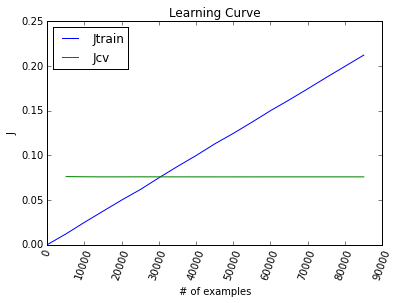

In [46]:
learningCurve(range(100, m, 5000), Xtrain, ytrain, Xcv, ycv, L)

# 2. Modify Lambda
    Lambda - f_score relationship

In [75]:
def bestLambda(listOfNum, Xtrain, ytrain, Xcv, ycv):
    '''
        prints lambda - f_score relationship
    returns: best lambda
    '''
    fscoreCv = []
    costCv = []
    
    for i in listOfNum:
        argsCv = (Xcv, ycv, i)    
        
        # train
        theta = logisticRegression(costFunction, gradFunction, \
                                   Xtrain, ytrain, i)
        
        # get fscore based on trained theta
        # get prediction
        prediction = getPrediction(theta, Xcv)

        # get measures
        measures = getMeasures(ycv, prediction)
        accuracy, precision, recall, fscore = measures
        
        fscoreCv.append(fscore)
        costCv.append(costFunction(theta, *argsCv))

    # plot learning curve
    plt.plot(listOfNum, fscoreCv, label = 'F-score')
    plt.plot(listOfNum, costCv, label = 'Jcv')
    
    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Lambda")
    plt.ylabel("F-score")
    plt.title("Lambda - F-score relationship")
    
    maxFscore = max(fscoreCv)
    maxIndexF = fscoreCv.index(maxFscore)
    
    minCostCv = min(costCv)
    minIndexCost = costCv.index(minCostCv)
    
    return listOfNum[maxIndexF], listOfNum[minIndexCost]

Optimization terminated successfully.
         Current function value: 0.224425
         Iterations: 90
         Function evaluations: 227
         Gradient evaluations: 227
Optimization terminated successfully.
         Current function value: 0.224438
         Iterations: 97
         Function evaluations: 279
         Gradient evaluations: 279
Optimization terminated successfully.
         Current function value: 0.224452
         Iterations: 86
         Function evaluations: 232
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: 0.224465
         Iterations: 96
         Function evaluations: 269
         Gradient evaluations: 269
Optimization terminated successfully.
         Current function value: 0.224478
         Iterations: 100
         Function evaluations: 262
         Gradient evaluations: 262
Optimization terminated successfully.
         Current function value: 0.224491
         Iterations: 68
         Function evaluat

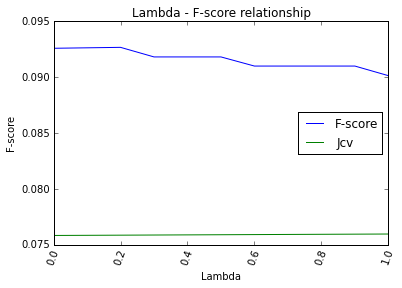

In [76]:
bestL_F, bestL_Cost = bestLambda(np.linspace(0, 1, 11), Xtrain, ytrain, Xcv, ycv)
print '\nLambda that maximizes F-score >>', bestL_F
print '\nLambda that minimizes Cost >>', bestL_Cost

# II.3. Modify Threshold
    threshold - f_score relationship

In [79]:
def bestThreshold(listOfNum, Xtrain, ytrain, Xcv, ycv, L):
    '''
        prints threshold - f_score relationship
    returns: best threshold
    '''
    fscoreCv = []
    accuracyCv = []
    costCv = []
    
    
    # train
    theta = logisticRegression(costFunction, gradFunction, \
                                   Xtrain, ytrain, L)
    argsCv = (Xcv, ycv, L)
    
    # for different number of thresholds
    for i in listOfNum:
        
        # get fscore based on trained theta
        # get prediction
        prediction = getPrediction(theta, Xcv, threshold = i)

        # get measures
        measures = getMeasures(ycv, prediction)
        accuracy, precision, recall, fscore = measures
        
        fscoreCv.append(fscore)
        accuracyCv.append(accuracy)
        costCv.append(costFunction(theta, *argsCv))

    # plot learning curve
    plt.figure()
    plt.plot(listOfNum, fscoreCv, label = 'F-score')
    plt.plot(listOfNum, accuracyCv, label = 'Accuracy')
    plt.plot(listOfNum, costCv, label = 'Jcv')
    
    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Threshold")
    plt.ylabel("F-score")
    plt.title("Threshold - F-score relationship")
    
    maxFscore = max(fscoreCv)
    maxIndex = fscoreCv.index(maxFscore)
    
    return listOfNum[maxIndex]


Optimization terminated successfully.
         Current function value: 0.224452
         Iterations: 80
         Function evaluations: 214
         Gradient evaluations: 214
Threshold that maximizes F-score >> 0.125
Optimization terminated successfully.
         Current function value: 0.224425
         Iterations: 87
         Function evaluations: 232
         Gradient evaluations: 232
Threshold that maximizes F-score >> 0.125


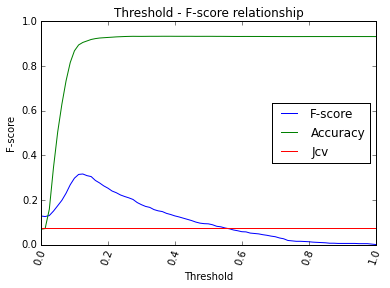

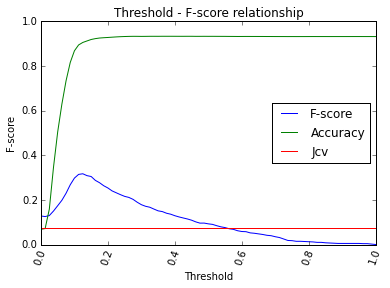

In [80]:
bestT = bestThreshold(np.linspace(0, 1, 81), Xtrain, ytrain, Xcv, ycv, bestL_F)
print 'Threshold that maximizes F-score >>', bestT

bestT = bestThreshold(np.linspace(0, 1, 81), Xtrain, ytrain, Xcv, ycv, bestL_Cost)
print 'Threshold that maximizes F-score >>', bestT

# II.5. Modified Model
    Train again with modified parameters
    (Higher f-score expected, in sacrifice of accuracy)

In [82]:
## Train AGAIN with modified parameters
theta_modified = logisticRegression(costFunction, gradFunction, Xtrain, ytrain, bestL_F)
prediction_modified = predict(theta_modified, Xtest, ytest, bestT)

Optimization terminated successfully.
         Current function value: 0.224452
         Iterations: 85
         Function evaluations: 222
         Gradient evaluations: 222
accuracy 0.906233333333
precision 0.310474401127
recall 0.329511465603
fscore 0.319709794438
